## Mini-project 1 : Machine Learning for Mental Health

In [1]:
# Using the Mental Health dataset and what you have learn this week, answer the following questions :

# What is the distribution of mental health conditions among different age groups in the tech industry?
# How does the frequency of mental health issues vary by gender?
# Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

### Load data

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Vlad\.kaggle"
os.environ['KAGGLE_CONFIG_DIR']

'C:\\Users\\Vlad\\.kaggle'

In [6]:
!mkdir datasets
!kaggle datasets download osmi/mental-health-in-tech-survey -p datasets

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0




  0%|          | 0.00/48.8k [00:00<?, ?B/s]
100%|██████████| 48.8k/48.8k [00:00<00:00, 334kB/s]
100%|██████████| 48.8k/48.8k [00:00<00:00, 331kB/s]


In [8]:
import zipfile

with zipfile.ZipFile("datasets/mental-health-in-tech-survey.zip", 'r') as f:
    f.extractall("datasets/")

### Initial data exploration

In [14]:
import pandas as pd

pd.options.display.max_columns = None

In [55]:
df = pd.read_csv("datasets/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [57]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:43:28,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
for col in df.columns:
    print(col, df[col].nunique())

Timestamp 1246
Age 53
Gender 49
Country 48
state 45
self_employed 2
family_history 2
treatment 2
work_interfere 4
no_employees 6
remote_work 2
tech_company 2
benefits 3
care_options 3
wellness_program 3
seek_help 3
anonymity 3
leave 5
mental_health_consequence 3
phys_health_consequence 3
coworkers 3
supervisor 3
mental_health_interview 3
phys_health_interview 3
mental_vs_physical 3
obs_consequence 2
comments 160


### Data cleaning

In [59]:
df['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                                          1
Mal                  

In [60]:
def clean_gender(gender):
    gender = gender.lower()

    if gender in ['male', 'm']:
        return 'male'
    elif gender in ['female', 'f']:
        return 'female'
    # I'm not trying to offend anyone
    # Just for the sake of the exercise
    else:
        return 'other'

In [61]:
df['Gender'] = df['Gender'].apply(clean_gender)

In [62]:
wrong_ages = (df["Age"] < 15) | (df["Age"] > 80)

df[wrong_ages]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
143,2014-08-27 12:39:14,-29,male,United States,MN,No,No,No,NaN,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
364,2014-08-27 15:05:21,329,male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,other,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
734,2014-08-28 10:35:55,5,male,United States,OH,No,No,No,NaN,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,other,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
1127,2014-08-30 20:55:11,-1,other,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered


In [63]:
# let's remove all rows with unusual age values because if they entered it incorrectly (by accident or with intention)
# then we don't want to use their answers in our analysis
df = df[~wrong_ages]

#### Handling missing values

In [64]:
missing_values = df.isnull().sum()

missing_values

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
dtype: int64

In [65]:
[col for col, cnt in missing_values.items() if cnt > 0]

['state', 'self_employed', 'work_interfere', 'comments']

In [66]:
df.self_employed.value_counts()

self_employed
No     1091
Yes     142
Name: count, dtype: int64

In [67]:
# self_employed fill with mode value
df.self_employed = df.self_employed.fillna(df.self_employed.mode()[0])

In [69]:
df.work_interfere.value_counts()

work_interfere
Sometimes    464
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

In [68]:
# let's leave work interfere and state columns as they are
df[df.work_interfere.isna()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
19,2014-08-27 11:35:08,36,male,France,NaN,Yes,Yes,No,NaN,6-25,Yes,Yes,No,No,Yes,No,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
26,2014-08-27 11:37:23,33,male,United States,TN,No,No,No,NaN,1-5,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
37,2014-08-27 11:41:50,38,male,Portugal,NaN,No,No,No,NaN,100-500,No,Yes,No,Yes,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN
38,2014-08-27 11:42:08,50,male,United States,IN,No,No,No,NaN,100-500,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
41,2014-08-27 11:42:31,35,male,United States,MI,No,No,No,NaN,More than 1000,Yes,Yes,Yes,Not sure,Don't know,Yes,Don't know,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2015-02-21 17:19:18,39,male,Netherlands,NaN,No,No,No,NaN,More than 1000,No,No,Yes,Not sure,Yes,Don't know,Don't know,Somewhat easy,Maybe,Maybe,No,Some of them,No,No,Yes,No,NaN
1229,2015-02-22 02:40:32,39,male,Greece,NaN,No,No,No,NaN,6-25,Yes,Yes,No,No,No,No,Yes,Don't know,Yes,No,No,No,No,No,Don't know,No,NaN
1244,2015-05-05 15:16:25,32,female,United Kingdom,NaN,No,No,No,NaN,More than 1000,No,No,No,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [70]:
df.drop('comments', axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1251 non-null   object
 1   Age                        1251 non-null   int64 
 2   Gender                     1251 non-null   object
 3   Country                    1251 non-null   object
 4   state                      738 non-null    object
 5   self_employed              1251 non-null   object
 6   family_history             1251 non-null   object
 7   treatment                  1251 non-null   object
 8   work_interfere             989 non-null    object
 9   no_employees               1251 non-null   object
 10  remote_work                1251 non-null   object
 11  tech_company               1251 non-null   object
 12  benefits                   1251 non-null   object
 13  care_options               1251 non-null   object
 14  wellness_prog

### What is the distribution of mental health conditions among different age groups in the tech industry?

In [89]:
age_bins = [0, 25, 30, 35, 45, 55, 100]
age_labels = [ '<25', *[f'{int(age_bins[i])}-{int(age_bins[i + 1] - 1)}' for i in range(1, len(age_bins) - 2)], '55+' ]
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

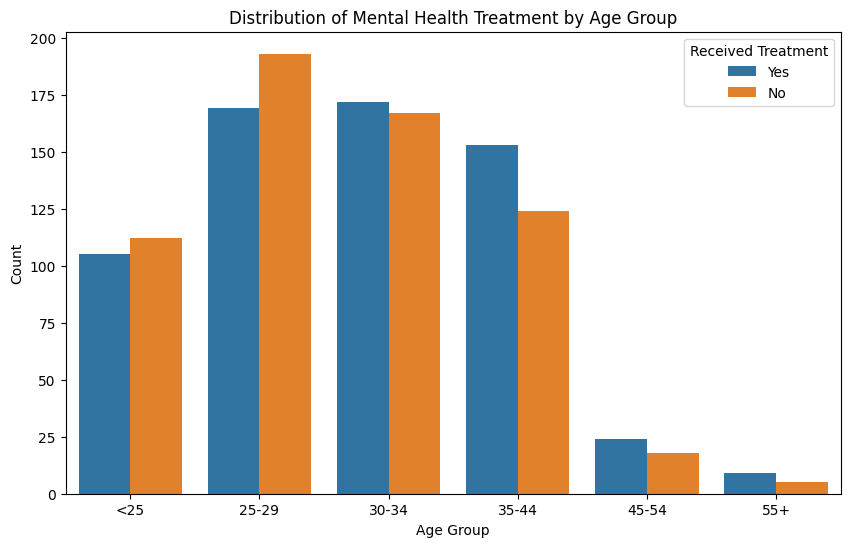

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


# age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='treatment')
plt.title('Distribution of Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Received Treatment')
plt.show()

### How does the frequency of mental health issues vary by gender?


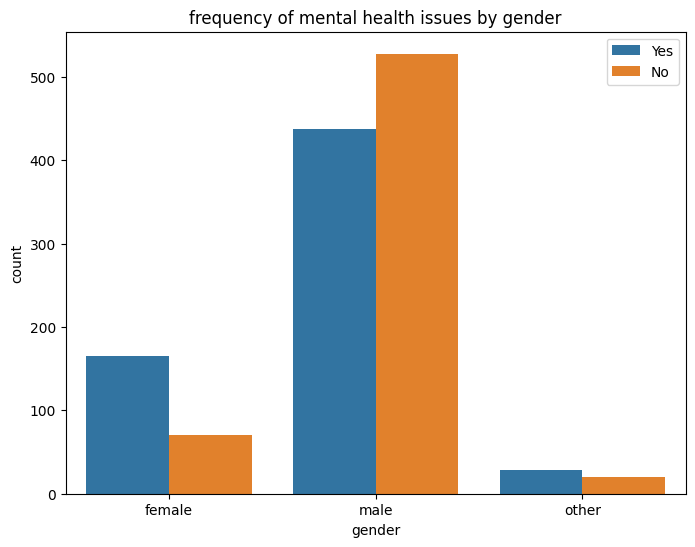

In [93]:

# 2. gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title('frequency of mental health issues by gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.legend()
plt.show()

In [99]:

country_mental_health = df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0).round(2)

country_mental_health.sort_values('Yes', ascending=False).head(15)

treatment,No,Yes
Country,,
Croatia,0.00,1.00
Denmark,0.00,1.00
Japan,0.00,1.00
Slovenia,0.00,1.00
Moldova,0.00,1.00
South Africa,0.33,0.67
Australia,0.38,0.62
New Zealand,0.38,0.62
Poland,0.43,0.57


In [100]:
country_mental_health.sort_values('Yes', ascending=True).head(15)


treatment,No,Yes
Country,,
Austria,1.0,0.0
Bosnia and Herzegovina,1.0,0.0
China,1.0,0.0
Colombia,1.0,0.0
Georgia,1.0,0.0
Czech Republic,1.0,0.0
Costa Rica,1.0,0.0
Greece,1.0,0.0
Latvia,1.0,0.0
